<a href="https://colab.research.google.com/github/Pasindusameera/Classification_And_Regression/blob/main/Term_deposit_Bank_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#Mounting G Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the file and read
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bank_customer_term_deposit/bankfull7.csv')

In [ ]:
# Head of the file
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#shape of the data
df.shape

(45211, 17)

In [ ]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#checking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [ ]:
#checking unique values
for columns in df.columns:
           print(columns)
           print("-"*50)
           print(df[columns].value_counts())
           print("-"*50)

age
--------------------------------------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
--------------------------------------------------
job
--------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------------
marital
--------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------------------------------------
education
--------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: educatio

In [ ]:
#find the descriptive statistick for numerical data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
#idintify categorical and numerical columns
target='Target'
non_features=[target]
cat_features=[col for col in df.select_dtypes('object').columns if col not in non_features]
num_features=[col for col in df.select_dtypes(np.number).columns if col not in non_features]

print("Categorical Features :\n",cat_features,"\n")
print("Numerical Features :\n",num_features)

Categorical Features :
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 

Numerical Features :
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


#Exploratory Data analysis and visualization

#Univariate and bivariate data analysis
#1)Categorical Data analysis and visualization
#2)Numerical Data analysis and visualization
#3)categorical vs numerical Data analysis and visualization


#1.Categorical Data analysis and visualization

In [ ]:
# printing unique value of categorical data
for col in df.columns: # looping through column names
    if df[col].dtype == 'object': # checking for object type data
        unique_values = pd.unique(df[col]) # storing unique values of features in a array
        print(f'{col} : {unique_values}\n') # printing formated string

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital : ['married' 'single' 'divorced']

education : ['tertiary' 'secondary' 'unknown' 'primary']

default : ['no' 'yes']

housing : ['yes' 'no']

loan : ['no' 'yes']

contact : ['unknown' 'cellular' 'telephone']

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome : ['unknown' 'failure' 'other' 'success']

Target : ['no' 'yes']



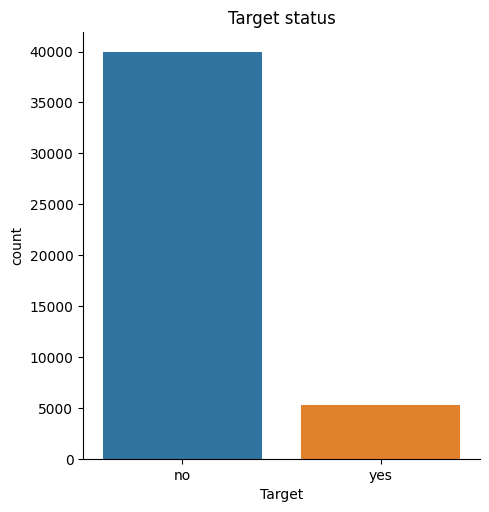

In [ ]:
#find the Target variable count with visualization
sns.catplot(x="Target", kind="count", data=df)
plt.title("Target status")
plt.show()

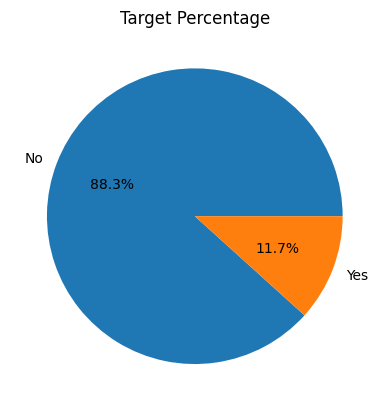

In [ ]:
#find the target variable precentage with visualization
Target_count = df['Target'].value_counts()
Target_pct = Target_count / len(df) * 100
Target_pct
# Create pie chart
fig, ax = plt.subplots()
ax.pie(Target_pct, labels=['No', 'Yes'], autopct='%1.1f%%')
ax.set_title('Target Percentage')

# Show the plot
plt.show()

In [ ]:
#idintify each categorical variable and Target variable count and precentages
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


for col in cols:
    Target_count = df.groupby([col, 'Target']).size().reset_index(name='count')
    Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)
    display(Target_count)

<ipython-input-18-a1b262ec2bf5>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)


,job,Target,count,percentage
0,admin.,no,4540,87.797331
1,admin.,yes,631,12.202669
2,blue-collar,no,9024,92.725031
3,blue-collar,yes,708,7.274969
4,entrepreneur,no,1364,91.728312
5,entrepreneur,yes,123,8.271688
6,housemaid,no,1131,91.209677
7,housemaid,yes,109,8.790323
8,management,no,8157,86.244449
9,management,yes,1301,13.755551


<ipython-input-18-a1b262ec2bf5>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)


,marital,Target,count,percentage
0,divorced,no,4585,88.054542
1,divorced,yes,622,11.945458
2,married,no,24459,89.876534
3,married,yes,2755,10.123466
4,single,no,10878,85.050821
5,single,yes,1912,14.949179


<ipython-input-18-a1b262ec2bf5>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)


,education,Target,count,percentage
0,primary,no,6260,91.373522
1,primary,yes,591,8.626478
2,secondary,no,20752,89.440565
3,secondary,yes,2450,10.559435
4,tertiary,no,11305,84.993610
5,tertiary,yes,1996,15.006390
6,unknown,no,1605,86.429725
7,unknown,yes,252,13.570275


<ipython-input-18-a1b262ec2bf5>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)


,default,Target,count,percentage
0,no,no,39159,88.203892
1,no,yes,5237,11.796108
2,yes,no,763,93.619632
3,yes,yes,52,6.380368


<ipython-input-18-a1b262ec2bf5>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)


,housing,Target,count,percentage
0,no,no,16727,83.297645
1,no,yes,3354,16.702355
2,yes,no,23195,92.300040
3,yes,yes,1935,7.699960


<ipython-input-18-a1b262ec2bf5>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)


,loan,Target,count,percentage
0,no,no,33162,87.344273
1,no,yes,4805,12.655727
2,yes,no,6760,93.318609
3,yes,yes,484,6.681391


<ipython-input-18-a1b262ec2bf5>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)


,contact,Target,count,percentage
0,cellular,no,24916,85.081100
1,cellular,yes,4369,14.918900
2,telephone,no,2516,86.579491
3,telephone,yes,390,13.420509
4,unknown,no,12490,95.929339
5,unknown,yes,530,4.070661


<ipython-input-18-a1b262ec2bf5>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)


,month,Target,count,percentage
0,apr,no,2355,80.320600
1,apr,yes,577,19.679400
2,aug,no,5559,88.986714
3,aug,yes,688,11.013286
4,dec,no,114,53.271028
5,dec,yes,100,46.728972
6,feb,no,2208,83.352208
7,feb,yes,441,16.647792
8,jan,no,1261,89.878831
9,jan,yes,142,10.121169


<ipython-input-18-a1b262ec2bf5>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Target_count['percentage'] = Target_count.groupby(col)['count'].apply(lambda x: x / x.sum() * 100)


,poutcome,Target,count,percentage
0,failure,no,4283,87.390329
1,failure,yes,618,12.609671
2,other,no,1533,83.315217
3,other,yes,307,16.684783
4,success,no,533,35.274653
5,success,yes,978,64.725347
6,unknown,no,33573,90.838497
7,unknown,yes,3386,9.161503


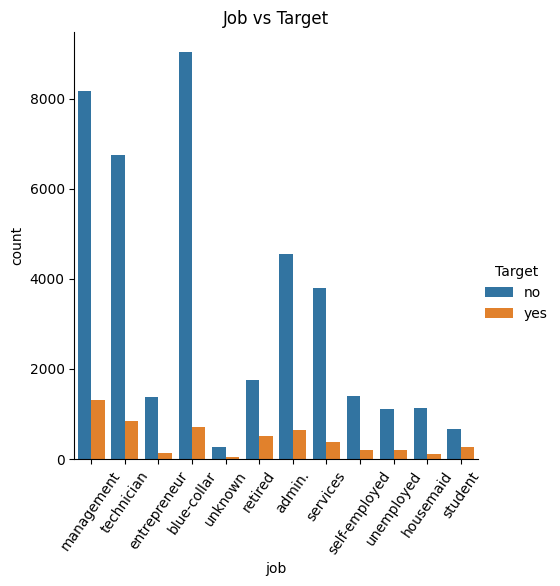

In [ ]:
#visualization of the jobs and target
sns.catplot(data=df,x='job',kind='count',hue='Target')
plt.xticks(rotation=55)
plt.title('Job vs Target')
plt.show()

Text(0.5, 1.0, 'Month')

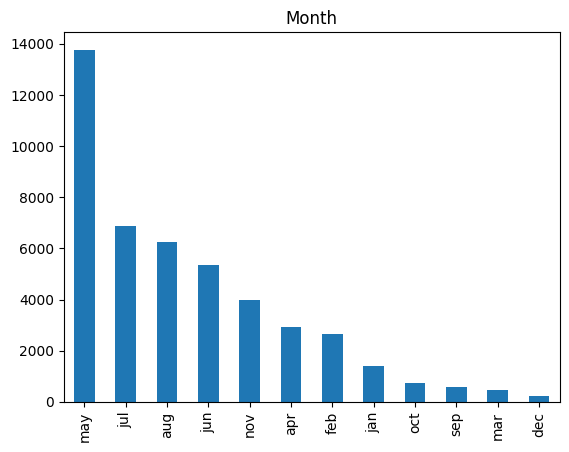

In [ ]:
month=df['month'].value_counts()
month.plot.bar()
plt.title('Month')

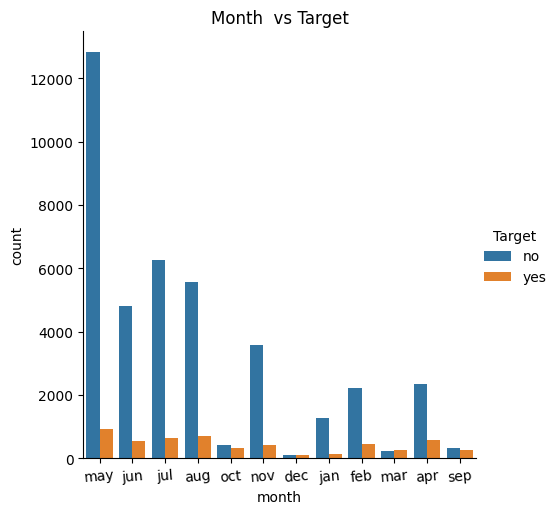

In [ ]:
sns.catplot(data=df,x='month',kind='count',hue='Target')
plt.xticks(rotation=5)
plt.title('Month  vs Target')
plt.show()

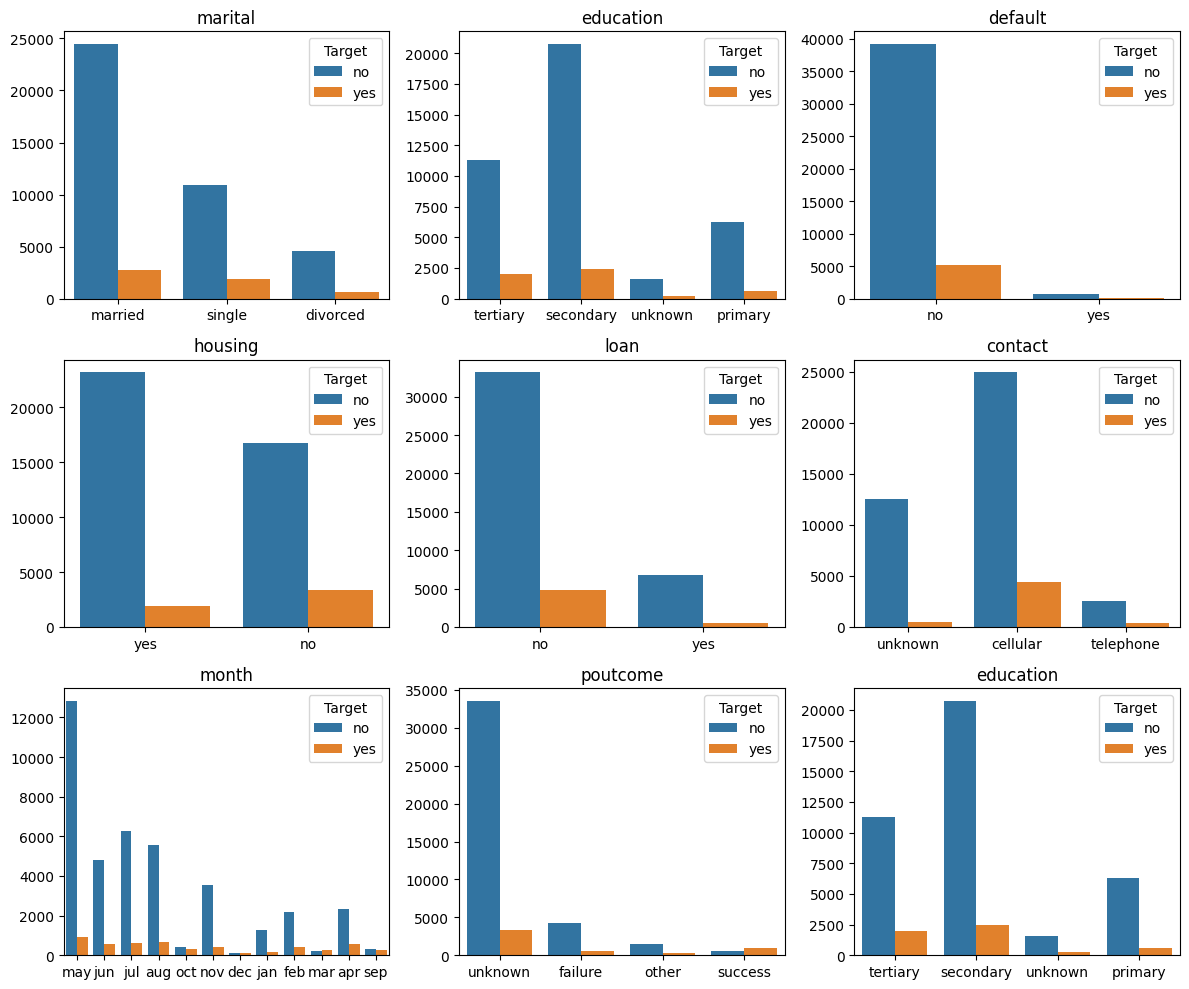

In [ ]:
cols = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','education']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue='Target', ax=ax)
    ax.set_title(col)
    ax.legend(title='Target')
    ax.set_xlabel(None)
    ax.set_ylabel(None)

plt.tight_layout()
plt.show()

#2)Numerical variables data analysis

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


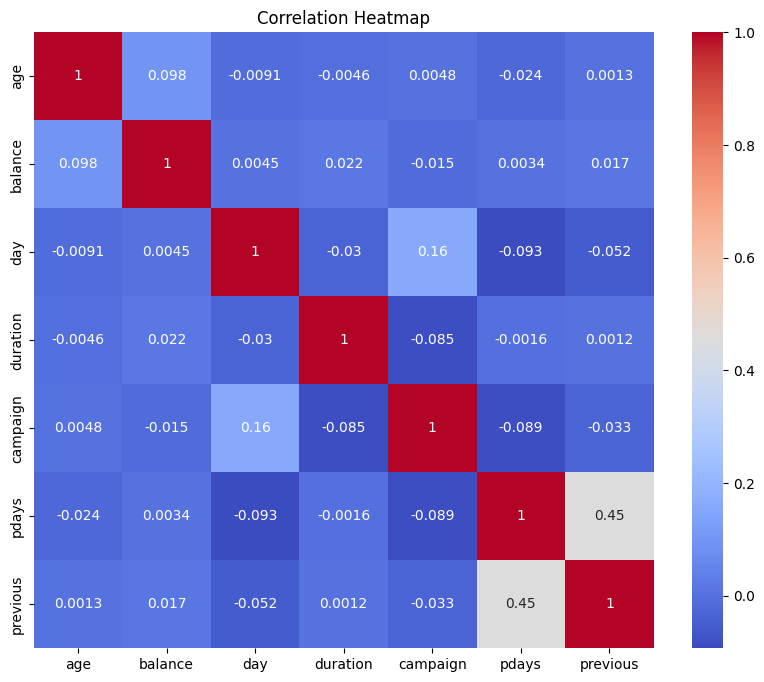

In [ ]:
columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
data = df[columns]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

<ipython-input-26-ef10805a1d37>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


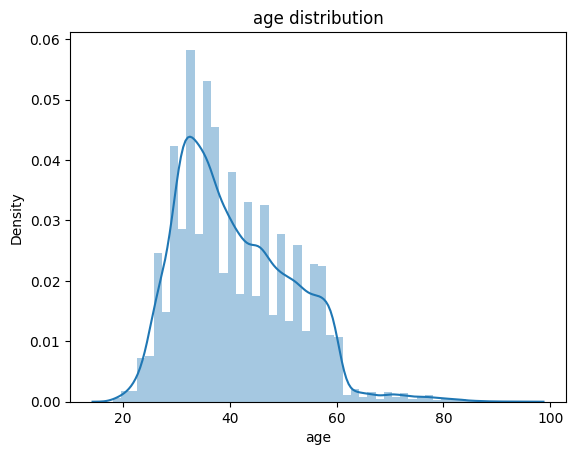

In [ ]:
#age distribution
sns.distplot(df.age)
plt.title('age distribution')
plt.show()

#3)Numerical data vs Categorical data visualization


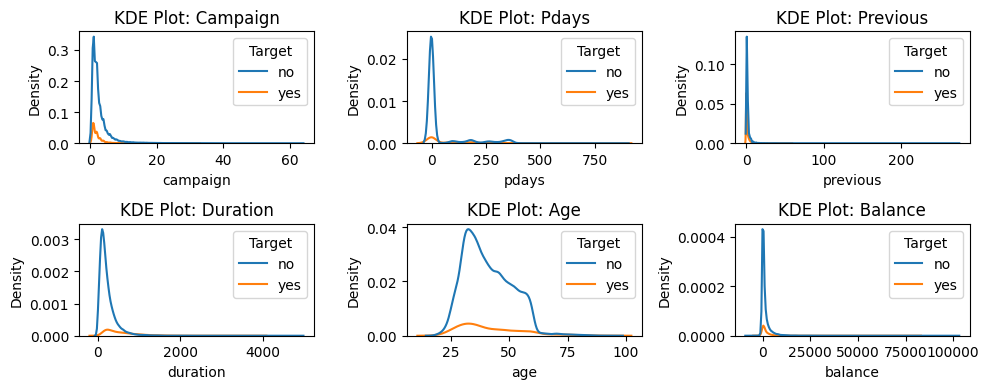

In [ ]:

variables = ['campaign', 'pdays', 'previous', 'duration', 'age', 'balance']

fig, axes = plt.subplots(2, 3, figsize=(10, 4))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.kdeplot(data=df, x=var, hue='Target', ax=axes[i])
    axes[i].set_title(f'KDE Plot: {var.capitalize()}')

plt.tight_layout()
plt.show()

#Logistick regression model

In [ ]:
#Label encoder every categorical variables
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
#Label encoder apply for data frame
df1 = df.apply(lambda x: object_to_int(x))
df1.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
#Y dependent variable and x indipendent variables select
x=df1.iloc[:,:16]
y=df1.iloc[:,16]

In [ ]:
#Data set divide by train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#Creating the logistick regression model


In [ ]:
model=LogisticRegression()

#Training the model with training data

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Estimated coefficients for parameters and intercept of the model

In [ ]:
model.coef_

array([[-2.43494138e-02,  1.77847089e-02, -1.11422254e-01,
        -1.76622771e-02, -6.56097658e-03,  3.42723630e-05,
        -2.18916031e-01, -6.29099743e-02, -2.21324717e-01,
        -1.85134202e-02, -6.48974711e-02,  3.54704411e-03,
        -3.14630158e-01, -1.10859450e-03,  1.34831628e-01,
        -2.20031866e-01]])

In [ ]:
model.intercept_

array([-0.08436395])

#Predict the class of the unseen data

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#Predicted probabilities for each observation

In [ ]:
y_pred_probs=model.predict_proba(x_test)
y_pred_probs #Left side column for 0 and right side column for 1

array([[0.97237374, 0.02762626],
       [0.94140921, 0.05859079],
       [0.62413086, 0.37586914],
       ...,
       [0.95972776, 0.04027224],
       [0.9988012 , 0.0011988 ],
       [0.91585535, 0.08414465]])

#Confusion matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[7840,  153],
       [ 864,  186]])

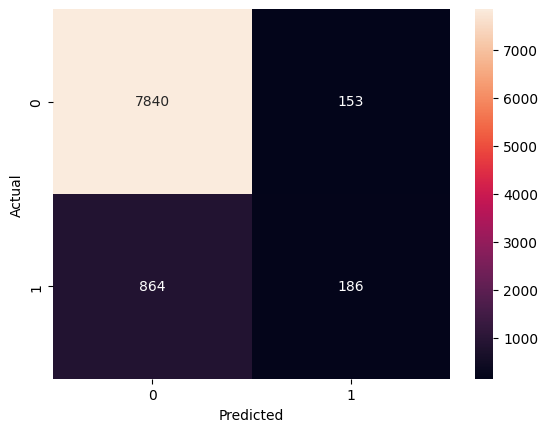

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Accuracy & Misclassification Error

In [ ]:
accuracy=(np.diag(confusion_matrix(y_test,y_pred)).sum())/len(y_test)
accuracy

0.8875373216852814

In [ ]:
accuracy_score(y_test,y_pred)

0.8875373216852814

In [ ]:
MCE=1-accuracy
MCE

0.11246267831471857

#Classification report with more metrics

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.55      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



#Receiver operating characteristic Curve (ROC Curve)

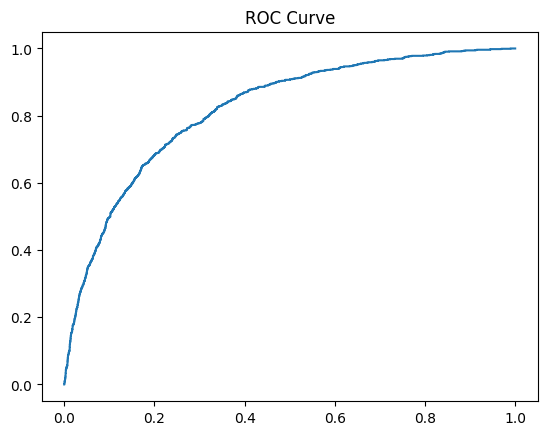

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_probs[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()